In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from glob import glob
import pickle
from tqdm import tqdm

from utils import FEATURES_DIR, RESULTS_DIR
from analyses.ridge_regression_decoding import NUM_CV_SPLITS, GLM_OUT_DIR
from notebook_utils import load_results_data

/home/mitja/anaconda3/envs/multimodal_decoding/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
all_data = load_results_data()
all_data

['/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_1/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_1000.0/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_1000.0_fold_1/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_1000.0_fold_2/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_1000.0_fold_3/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_1000.0_fold_4/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_100000.0/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_100000.0_best_val_acc/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_100000.0_best_val_loss/results.p', '/home/mitja/data/multimodal_decoding/glm/train/sub-01/clip_avg_alpha_100000.0_fold_1/results.p', '/home/mitja/data/multimodal_decoding/glm/tr

,alpha,model,subject,features,training_mode,testing_mode,fold,best_val_loss,best_val_acc,metric,value
0,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,val_loss,0.949708
1,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,val_rsa,0.031339
2,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,rsa,0.189683
3,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,acc_cosine,0.867081
4,1.0,clip_avg,sub-01,avg,train,test,0.0,False,False,acc_cosine_captions,0.831884
...,...,...,...,...,...,...,...,...,...,...,...
333,1.0,clip_avg,average,avg,train,test,4.0,False,False,rsa,0.113673
334,1.0,clip_avg,average,avg,train,test,4.0,False,False,acc_cosine,0.823913
335,1.0,clip_avg,average,avg,train,test,4.0,False,False,acc_cosine_captions,0.768530
336,1.0,clip_avg,average,avg,train,test,4.0,False,False,acc_cosine_images,0.893375


In [3]:
def plot_test_metrics(data, distance_metric = 'cosine'):
    metrics = [f'acc_{distance_metric}', f'acc_{distance_metric}_captions', f'acc_{distance_metric}_images']
    
    data_filtered = data[data.metric.isin(metrics)]
    # data_filtered = data

    sns.set_style("ticks", {'axes.grid' : True})
    g = sns.catplot(data_filtered, kind="bar", x="subject", y="value", col="metric", height=4, aspect=1, hue="model")#, palette="Set3"
    g._legend.remove()
    g.fig.legend(loc='upper left', title="", bbox_to_anchor=(1, 0.9)) # ,ncol=2

    g.set(ylim=(0.5, 1))
    
    plt.suptitle("Test Performance", fontsize=16)
    plt.tight_layout()
    
    plt.savefig(os.path.join(RESULTS_DIR, "model_comparison.png"), dpi=300)

def plot_test_metrics_rsa(data, distance_metric = 'cosine'):
    metrics = ['rsa']
    
    data_filtered = data[data.metric.isin(metrics)]
    # data_filtered = data

    sns.set_style("ticks", {'axes.grid' : True})
    g = sns.catplot(data_filtered, kind="bar", x="subject", y="value", col="metric", height=4, aspect=1, hue="model")#, palette="Set3"
    g._legend.remove()
    g.fig.legend(loc='upper left', title="", bbox_to_anchor=(1, 0.9)) # ,ncol=2

    g.set(ylim=(0, 0.3))
    
    plt.suptitle("RSA Test Performance", fontsize=16)
    plt.tight_layout()
    
    plt.savefig(os.path.join(RESULTS_DIR, "model_comparison_rsa.png"), dpi=300)


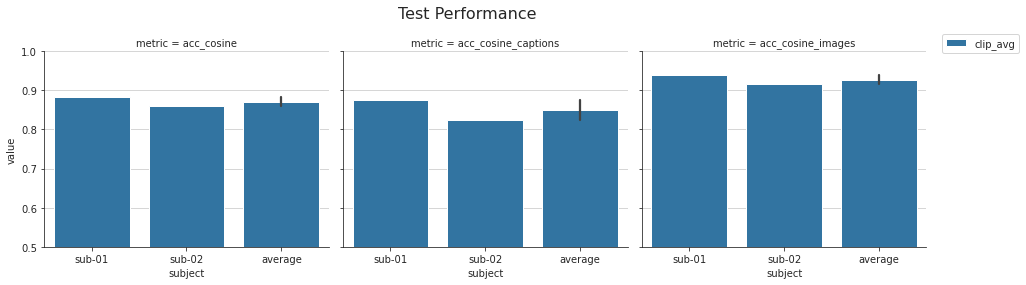

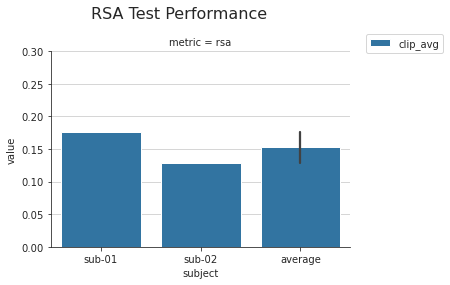

In [4]:
data_to_plot = all_data

# data_to_plot = data_to_plot[~data_to_plot.hp_str.str.contains("[loss:cosine_distance]")]
# print(data_to_plot.hp_str.str.contains("[loss:cosine_distance]"))

data_to_plot = data_to_plot[data_to_plot.best_val_acc == True]
# data_to_plot = data_to_plot[data_to_plot.best_val_loss == True]

# print(data_to_plot.hp_str.unique())
# assert len(data_to_plot.hp_str.unique()) == 1
# print(data_to_plot.hp_str.unique()[0])

plot_test_metrics(data_to_plot)
plot_test_metrics_rsa(data_to_plot)

In [5]:
data_to_plot[data_to_plot.best_val_acc == True]

,alpha,model,subject,features,training_mode,testing_mode,fold,best_val_loss,best_val_acc,metric,value
49,100000.0,clip_avg,sub-01,avg,train,test,NaN,False,True,rsa,0.175699
50,100000.0,clip_avg,sub-01,avg,train,test,NaN,False,True,acc_cosine,0.882091
51,100000.0,clip_avg,sub-01,avg,train,test,NaN,False,True,acc_cosine_captions,0.874534
52,100000.0,clip_avg,sub-01,avg,train,test,NaN,False,True,acc_cosine_images,0.937888
274,100000.0,clip_avg,sub-02,avg,train,test,NaN,False,True,rsa,0.129127
275,100000.0,clip_avg,sub-02,avg,train,test,NaN,False,True,acc_cosine,0.858799
276,100000.0,clip_avg,sub-02,avg,train,test,NaN,False,True,acc_cosine_captions,0.823395
277,100000.0,clip_avg,sub-02,avg,train,test,NaN,False,True,acc_cosine_images,0.917391
49,100000.0,clip_avg,average,avg,train,test,NaN,False,True,rsa,0.175699
50,100000.0,clip_avg,average,avg,train,test,NaN,False,True,acc_cosine,0.882091
